In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ***Data Understanding***

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***RowNumber***

In [5]:
df["RowNumber"].nunique()

10000

In [6]:
# All values are unique , drop the varibale
df.drop("RowNumber", axis = 1, inplace = True)

***CustomerId***

In [7]:
df["CustomerId"].nunique()

10000

In [8]:
# All values are unique , drop the varibale
df.drop("CustomerId", axis = 1, inplace = True)

***Surname***

In [9]:
df["Surname"].nunique()

2932

In [10]:
# To predict the chrun surname doesn't play any important role. So we will drop this variable
df.drop("Surname", axis = 1, inplace = True)

***CreditScore***

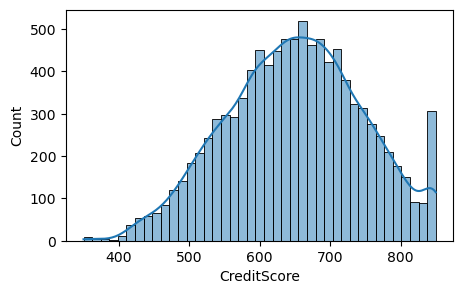

In [11]:
plt.figure(figsize = (5,3))
sns.histplot(df["CreditScore"], kde = True)
plt.show()

***Geography***

In [12]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

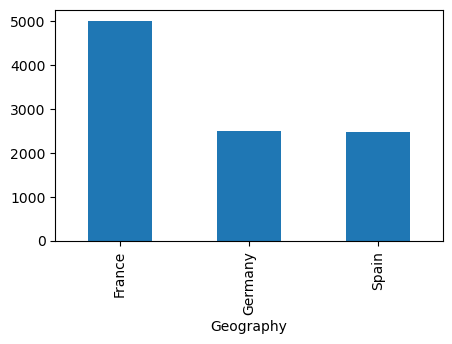

In [13]:
plt.figure(figsize = (5,3))
df["Geography"].value_counts().plot(kind = "bar")
plt.show()

***Gender***

In [14]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

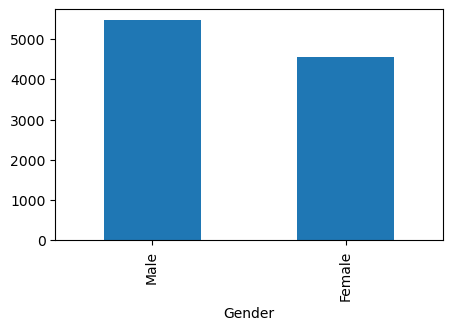

In [15]:
plt.figure(figsize = (5,3))
df["Gender"].value_counts().plot(kind = "bar")
plt.show()

***Age***

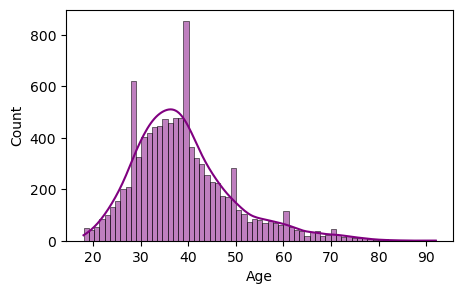

In [16]:
plt.figure(figsize = (5, 3))
sns.histplot(df["Age"], kde = True, color = "purple")
plt.show()

***Tenure***

In [17]:
df["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

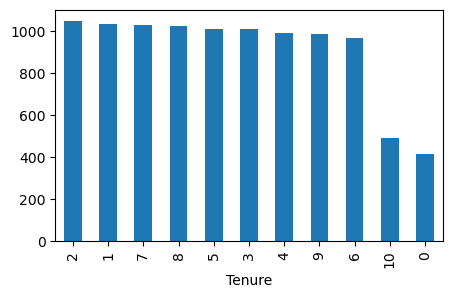

In [18]:
plt.figure(figsize = (5, 3))
df["Tenure"].value_counts().plot(kind = "bar")
plt.show()

In [19]:
pd.crosstab(df["Gender"], df["Tenure"])

Tenure,0,1,2,3,4,5,6,7,8,9,10
Gender,,,,,,,,,,,
Female,204,478,480,469,442,448,458,464,433,422,245
Male,209,557,568,540,547,564,509,564,592,562,245


***Balance***

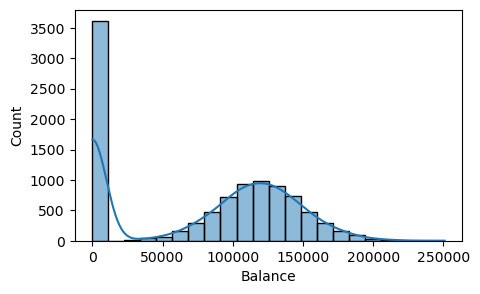

In [20]:
plt.figure(figsize = (5, 3))
sns.histplot(df["Balance"], kde = True)
plt.show()

***NumOfProducts***

In [21]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

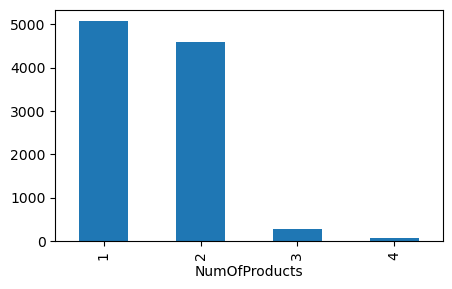

In [22]:
plt.figure(figsize = (5, 3))
df["NumOfProducts"].value_counts().plot(kind = "bar")
plt.show()

In [23]:
pd.crosstab(df["Gender"], df["NumOfProducts"], margins = True)

NumOfProducts,1,2,3,4,All
Gender,,,,,
Female,2296,2060,149,38,4543
Male,2788,2530,117,22,5457
All,5084,4590,266,60,10000


***HasCrCard***

In [24]:
df["HasCrCard"].unique()

array([1, 0], dtype=int64)

In [25]:
pd.crosstab(df["Gender"], df["HasCrCard"], margins = True)

HasCrCard,0,1,All
Gender,,,
Female,1351,3192,4543
Male,1594,3863,5457
All,2945,7055,10000


***IsActiveMember***

In [26]:
df["IsActiveMember"].unique()

array([1, 0], dtype=int64)

In [27]:
pd.crosstab(df["Gender"], df["IsActiveMember"], margins = True)

IsActiveMember,0,1,All
Gender,,,
Female,2259,2284,4543
Male,2590,2867,5457
All,4849,5151,10000


In [28]:
pd.crosstab(df["HasCrCard"], df["IsActiveMember"], margins = True)

IsActiveMember,0,1,All
HasCrCard,,,
0,1401,1544,2945
1,3448,3607,7055
All,4849,5151,10000


***EstimatedSalary***

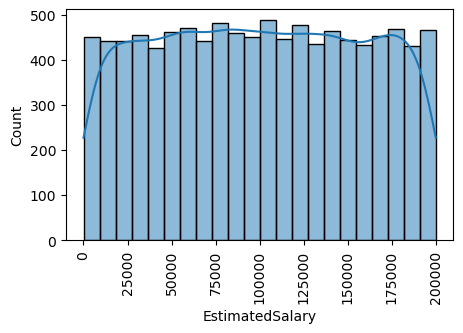

In [29]:
plt.figure(figsize = (5, 3))
sns.histplot(df["EstimatedSalary"], kde = True)
plt.xticks(rotation = "vertical")
plt.show()

***Exited***

In [30]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [31]:
pd.crosstab(df["Exited"], df["Gender"], margins = True)

Gender,Female,Male,All
Exited,,,
0,3404,4559,7963
1,1139,898,2037
All,4543,5457,10000


In [32]:
pd.crosstab(df["Exited"], df["Geography"], margins = True)

Geography,France,Germany,Spain,All
Exited,,,,
0,4204,1695,2064,7963
1,810,814,413,2037
All,5014,2509,2477,10000


In [33]:
df.groupby("Exited")["EstimatedSalary"].mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

In [34]:
df.groupby("Exited")["Balance"].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [35]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [36]:
pd.crosstab(df["Exited"], df["HasCrCard"], margins = True)

HasCrCard,0,1,All
Exited,,,
0,2332,5631,7963
1,613,1424,2037
All,2945,7055,10000


In [37]:
pd.crosstab(df["Exited"], df["IsActiveMember"], margins = True)

IsActiveMember,0,1,All
Exited,,,
0,3547,4416,7963
1,1302,735,2037
All,4849,5151,10000


In [38]:
pd.crosstab(df["Exited"], df["NumOfProducts"], margins = True)

NumOfProducts,1,2,3,4,All
Exited,,,,,
0,3675,4242,46,0,7963
1,1409,348,220,60,2037
All,5084,4590,266,60,10000


# ***Data Preprocessing***

***Data Cleaning***

In [39]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
df.duplicated().sum()

0

***EDA***

In [41]:
df.describe(include = "object")

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [42]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


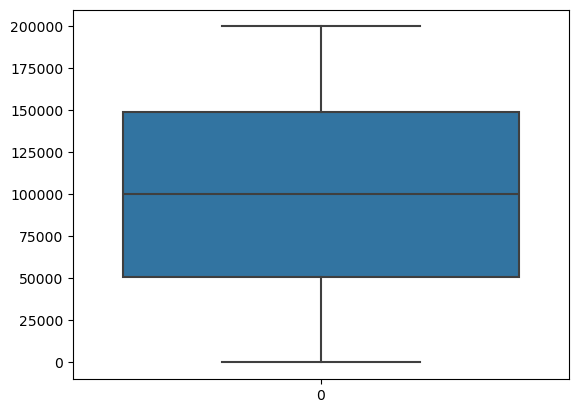

In [43]:
sns.boxplot(df["EstimatedSalary"])
plt.show()

In [50]:
corr = df.drop("Geography", axis = 1).corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.002857,-0.005334,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Gender,-0.002857,1.000000,-0.027679,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.005334,-0.027679,1.000000,-0.010641,0.029775,-0.030597,-0.011835,0.075259,-0.006734,0.292224
Tenure,0.000842,0.014733,-0.010641,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.012087,0.029775,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.021859,-0.030597,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,0.005766,-0.011835,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.022544,0.075259,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.008112,-0.006734,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,-0.106512,0.292224,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

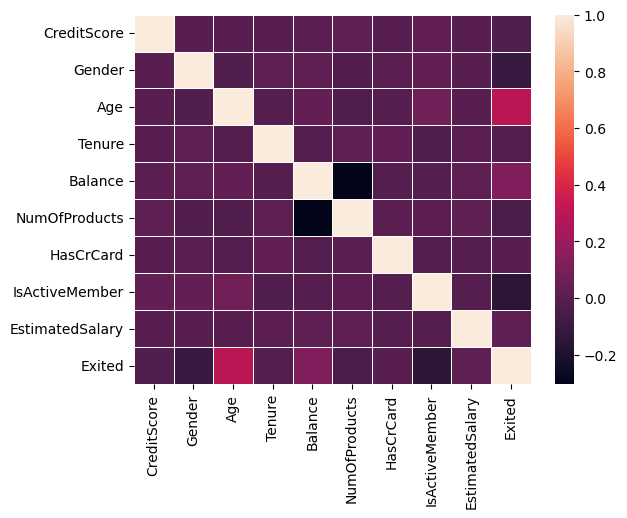

In [53]:
sns.heatmap(corr, linewidth = 0.5)

***Feature Encoding***

In [44]:
df["Gender"].replace({"Female": 0, "Male": 1}, inplace = True)

***Feature Transformation***

In [45]:
df.drop("Geography", axis = 1).skew()

CreditScore       -0.071607
Gender            -0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [46]:
df["Age"] = (df["Age"] ** (1/2))

In [47]:
df.to_csv("Churn_analyzed.csv")